# FRAGANCE SCORE: 
## MODELO PREDITIVO PARA AVALIAÇÃO DE PERFUMES

# Autores:
- Caio Cezar Veronezi Macedo, RA: 11050916, email: cezar.veronezi@aluno.ufabc.edu.br

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Caio\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Importação dos dados

In [2]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-12-10/parfumo_data_clean.csv'

parfum = pd.read_csv(url)

parfum.head()

,Number,Name,Brand,Release_Year,Concentration,Rating_Value,Rating_Count,Main_Accords,Top_Notes,Middle_Notes,Base_Notes,Perfumers,URL
0,455,Tabac Écarlate,Le Ré Noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Valery Sokolov / Валерий Соколов,https://www.parfumo.com/Perfumes/Le_Re_Noir/45...
1,0071,Tidal Pool,CB I Hate Perfume,2004.0,NaN,NaN,NaN,NaN,Bergamot,French lavender,"Musk, Foulness",Harry Frémont,https://www.parfumo.com/Perfumes/CB_I_Hate_Per...
2,0154,Pumpkin Pie,CB I Hate Perfume,1998.0,NaN,NaN,NaN,"Green, Leathery, Chypre, Animal",NaN,NaN,NaN,NaN,https://www.parfumo.com/Perfumes/CB_I_Hate_Per...
3,0162,Wet Stone,CB I Hate Perfume,2006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.parfumo.com/Perfumes/CB_I_Hate_Per...
4,0171,Chocolate Box,CB I Hate Perfume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.parfumo.com/Perfumes/CB_I_Hate_Per...


In [4]:
parfum.columns

Index(['Number', 'Name', 'Brand', 'Release_Year', 'Concentration',
       'Rating_Value', 'Rating_Count', 'Main_Accords', 'Top_Notes',
       'Middle_Notes', 'Base_Notes', 'Perfumers', 'URL'],
      dtype='object')

In [3]:
parfum.count()

Number            1420
Name             59324
Brand            59324
Release_Year     39009
Concentration    12483
Rating_Value     30046
Rating_Count     30046
Main_Accords     32225
Top_Notes        31139
Middle_Notes     31149
Base_Notes       31154
Perfumers        20544
URL              59325
dtype: int64

## Introdução ao tema & descrição das variáveis do dataset selecionado

Os dados sobre perfumes incluem informações detalhadas sobre várias características de fragrâncias de diferentes marcas. Abaixo está uma breve descrição de cada variável:

1. **Number**: Identificador único ou número atribuído a cada perfume para diferenciá-los.
2. **Name**: Nome do perfume ou fragrância.
3. **Brand**: Marca ou fabricante responsável pela criação do perfume.
4. **Release_Year**: Ano de lançamento do perfume no mercado.
5. **Concentration**: Tipo de concentração da fragrância, como Eau de Parfum ou Eau de Toilette.
6. **Rating_Value**: A nota geral dada pelos usuários com base em sua avaliação do perfume.
7. **Rating_Count**: Número total de avaliações feitas pelos usuários sobre o perfume.
8. **Main_Accords**: Principais características olfativas ou acordes do perfume, como floral, amadeirado, frutado, etc.
9. **Top_Notes**: Notas iniciais da fragrância, que são percebidas logo após a aplicação.
10. **Middle_Notes**: Notas intermediárias ou "coração" da fragrância, que aparecem após a dissipação das notas iniciais.
11. **Base_Notes**: Notas finais e duradouras do perfume, que permanecem após a fragrância secar.
12. **Perfumers**: Criadores ou perfumistas responsáveis pela composição do perfume.
13. **URL**: Link para a página do produto no site Parfumo.com, onde os usuários podem obter mais informações sobre o perfume.

Essas variáveis ajudam a analisar e classificar os perfumes com base em suas características olfativas, avaliações dos usuários e informações de lançamento.

### Variáveis Contínuas:
- **Release_Year**
- **Rating_Value**
- **Rating_Count**

### Variáveis Categóricas:
- **Number**
- **Name**
- **Brand**
- **Concentration**
- **Main_Accords**
- **Top_Notes**
- **Middle_Notes**
- **Base_Notes**
- **Perfumers**
- **URL**

## Análise exploratória

In [9]:
# Exibir informações gerais do dataset
parfum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59325 entries, 0 to 59324
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Number         1420 non-null   object 
 1   Name           59324 non-null  object 
 2   Brand          59324 non-null  object 
 3   Release_Year   39009 non-null  float64
 4   Concentration  12483 non-null  object 
 5   Rating_Value   30046 non-null  float64
 6   Rating_Count   30046 non-null  float64
 7   Main_Accords   32225 non-null  object 
 8   Top_Notes      31139 non-null  object 
 9   Middle_Notes   31149 non-null  object 
 10  Base_Notes     31154 non-null  object 
 11  Perfumers      20544 non-null  object 
 12  URL            59325 non-null  object 
dtypes: float64(3), object(10)
memory usage: 5.9+ MB


In [10]:
# Resumo estatístico das variáveis numéricas
print(parfum.describe())

       Release_Year  Rating_Value  Rating_Count
count  39009.000000  30046.000000  30046.000000
mean    2006.260043      7.347111     60.654929
std       22.879287      0.933537    118.187777
min     1709.000000      0.000000      2.000000
25%     2005.000000      6.900000      6.000000
50%     2013.000000      7.400000     19.000000
75%     2018.000000      7.900000     62.000000
max     2024.000000     10.000000   2732.000000


In [11]:
# Verificar valores ausentes
parfum.isnull().sum()

Number           57905
Name                 1
Brand                1
Release_Year     20316
Concentration    46842
Rating_Value     29279
Rating_Count     29279
Main_Accords     27100
Top_Notes        28186
Middle_Notes     28176
Base_Notes       28171
Perfumers        38781
URL                  0
dtype: int64

c:\Users\Caio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Caio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Caio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


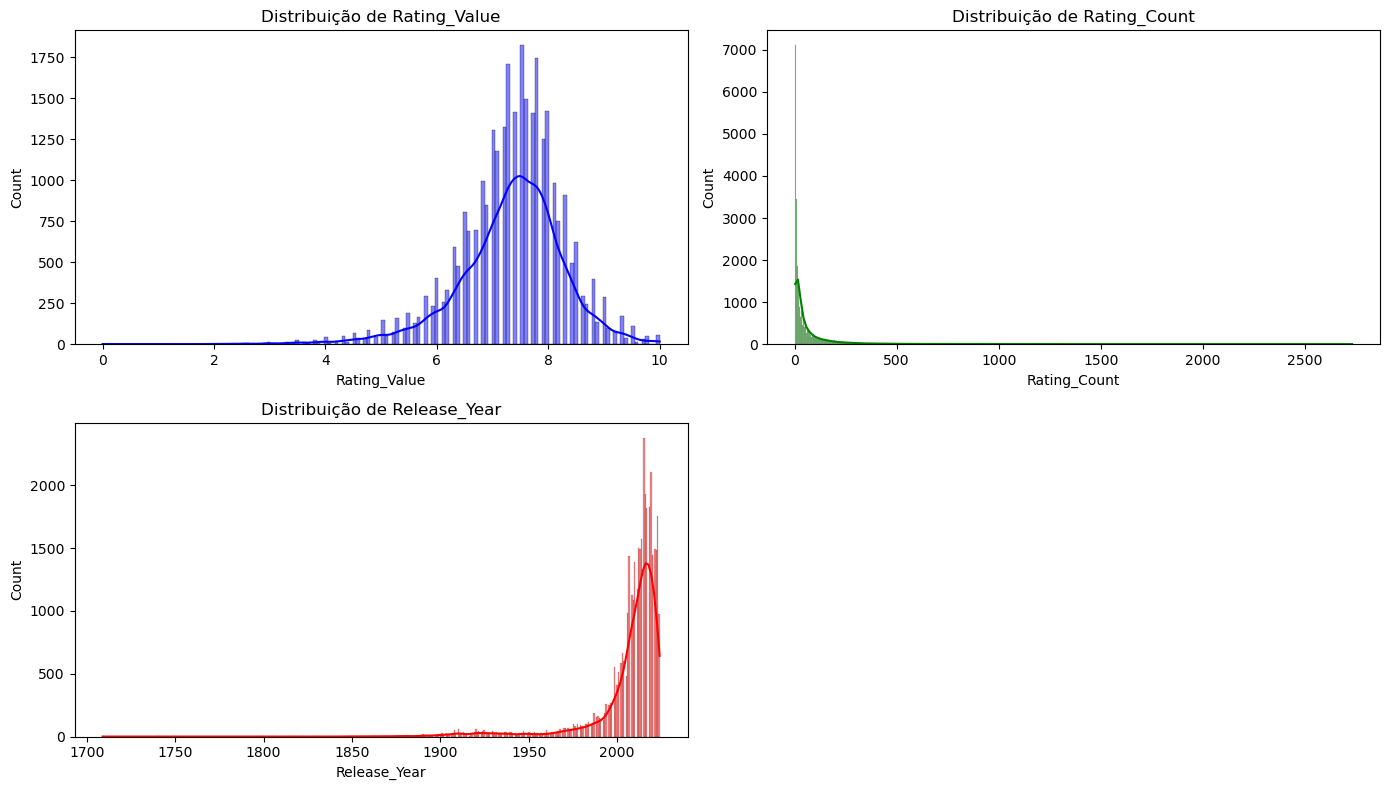

C:\Users\Caio\AppData\Local\Temp\ipykernel_10728\1871332523.py:40: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from current font.
  plt.tight_layout()
C:\Users\Caio\AppData\Local\Temp\ipykernel_10728\1871332523.py:40: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  plt.tight_layout()
C:\Users\Caio\AppData\Local\Temp\ipykernel_10728\1871332523.py:40: UserWarning: Glyph 22530 (\N{CJK UNIFIED IDEOGRAPH-5802}) missing from current font.
  plt.tight_layout()
C:\Users\Caio\AppData\Local\Temp\ipykernel_10728\1871332523.py:40: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from current font.
  plt.tight_layout()
C:\Users\Caio\AppData\Local\Temp\ipykernel_10728\1871332523.py:40: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from current font.
  plt.tight_layout()
C:\Users\Caio\AppData\Local\Temp\ipykernel_10728\1871332523.py:40: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  plt.t

KeyboardInterrupt: 

In [ ]:
# Distribuição das variáveis numéricas (Rating_Value, Rating_Count, Release_Year)
plt.figure(figsize=(14, 8))

# Rating Value
plt.subplot(2, 2, 1)
sns.histplot(parfum['Rating_Value'], kde=True, color='blue')
plt.title('Distribuição de Rating_Value')

# Rating Count
plt.subplot(2, 2, 2)
sns.histplot(parfum['Rating_Count'], kde=True, color='green')
plt.title('Distribuição de Rating_Count')

# Release Year
plt.subplot(2, 2, 3)
sns.histplot(parfum['Release_Year'], kde=True, color='red')
plt.title('Distribuição de Release_Year')

plt.tight_layout()
plt.show()

# Distribuição das variáveis categóricas (Brand, Concentration, Main_Accords)
plt.figure(figsize=(14, 8))

# Distribuição das marcas
plt.subplot(2, 2, 1)
sns.countplot(data=parfum, y='Brand', order=parfum['Brand'].value_counts().index)
plt.title('Distribuição das Marcas')

# Distribuição das concentrações
plt.subplot(2, 2, 2)
sns.countplot(data=parfum, y='Concentration', order=parfum['Concentration'].value_counts().index)
plt.title('Distribuição das Concentrações')

# Distribuição dos principais acordes
plt.subplot(2, 2, 3)
sns.countplot(data=parfum, y='Main_Accords', order=parfum['Main_Accords'].value_counts().index)
plt.title('Distribuição dos Principais Acordes')

plt.tight_layout()
plt.show()

# Correlação entre variáveis numéricas (Rating_Value, Rating_Count, Release_Year)
corr_matrix = parfum[['Rating_Value', 'Rating_Count', 'Release_Year']].corr()

# Plotando a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

# Analisando perfumistas e suas contribuições (Top 10 perfumistas mais frequentes)
top_perfumers = parfum['Perfumers'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_perfumers.values, y=top_perfumers.index, palette='viridis')
plt.title('Top 10 Perfumistas Mais Frequentes')
plt.xlabel('Número de Perfumes')
plt.ylabel('Perfumista')
plt.show()

## Tratamento de nulos

## Observação e tratamento de Outliers